### Imports & Cleaning

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
from uszipcode import SearchEngine, Zipcode
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline

In [10]:
df = pd.read_csv('shipohi_DS_ORDER_TAKEHOME.csv')

In [11]:
df.head()

,Orders Order Number,Orders Shipping Zipcode,Orders Shipping State,Orders Received Date,Orders Line Items Count,Orders Total Weight,Orders Cart Value
0,11815,01020,MA,2019-06-30,1,0,$39.00
1,12168,01568,MA,2019-07-25,1,0,$54.40
2,12079,01568,MA,2019-07-17,4,317,$84.20
3,11862,01778,MA,2019-07-04,2,249,$28.00
4,11960,02035,MA,2019-07-09,2,90,$80.00


In [20]:
# Changing dates to datetime
df['Orders Received Date'] = pd.to_datetime(df['Orders Received Date'])

# Sanitizing Zip Codes
df['Orders Shipping Zipcode'] = df['Orders Shipping Zipcode'].apply(lambda x: x.split('-')[0])

# Sanitizing Cart Value
df['Orders Cart Value'] = df['Orders Cart Value'].apply(lambda x: float(x.split('$')[1]))

In [21]:
df.head()

,Orders Order Number,Orders Shipping Zipcode,Orders Shipping State,Orders Received Date,Orders Line Items Count,Orders Total Weight,Orders Cart Value
0,11815,01020,MA,2019-06-30,1,0,39.0
1,12168,01568,MA,2019-07-25,1,0,54.4
2,12079,01568,MA,2019-07-17,4,317,84.2
3,11862,01778,MA,2019-07-04,2,249,28.0
4,11960,02035,MA,2019-07-09,2,90,80.0


## Are orders consistent throughout the month?
What insights can our order dates give us in general, before diving into orders by State?

In [152]:
len(order_count_per_day)

31

Summary Statistics for Number of Orders per Day
----------------------------------------
Average # of Orders:  Order Count Per Day    13.26
dtype: float64
Median # of Orders:  Order Count Per Day    13.0
dtype: float64
----------------------------------------


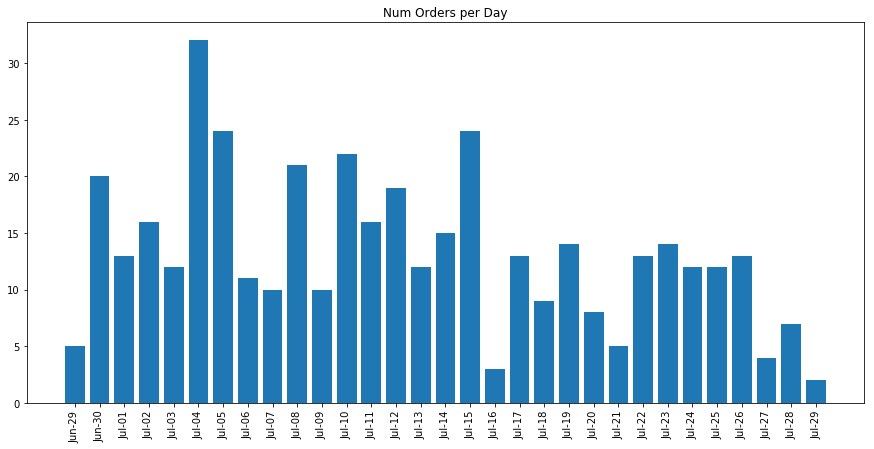

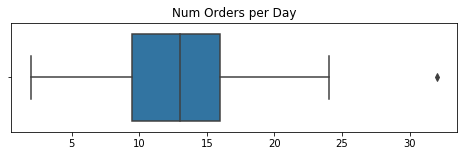

In [180]:
order_count_per_day = df.groupby(
    [df["Orders Received Date"]]).size().reset_index(name='Order Count Per Day').set_index("Orders Received Date")

print('Summary Statistics for Number of Orders per Day')
print('----------------------------------------')
print("Average # of Orders: ", round(order_count_per_day.mean(),2))
print("Median # of Orders: ", round(order_count_per_day.median(),2))
print('----------------------------------------')

# plotting distribution
x=order_count_per_day.index
y=order_count_per_day['Order Count Per Day']
fig, ax = plt.subplots(figsize=(15,7))

ax.bar(x,y)
ax.set_xticks(x[::])
ax.set_xticklabels(x[::], rotation=90)
ax.set_title('Num Orders per Day')
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
                                                   
                                                      
# plot data
plt.subplots(figsize=(8,2))
plt.title('Num Orders per Day')
sns.boxplot(order_count_per_day)

plt.show()

Summary Statistics for Line Items Ordered per Day
----------------------------------------
Average Units Ordered:  Orders Line Items Count    27.87
dtype: float64
Median Units Ordered:  Orders Line Items Count    27.0
dtype: float64
----------------------------------------


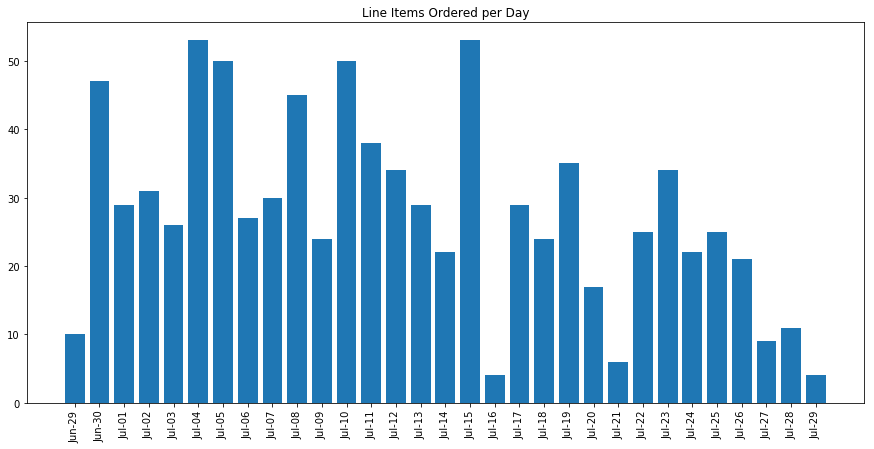

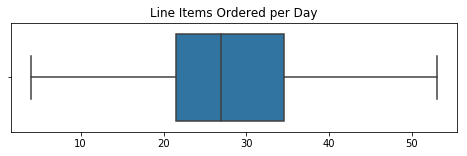

In [202]:
line_items_per_day = df.groupby([df["Orders Received Date"]]).sum()['Orders Line Items Count'].reset_index(
    name='Orders Line Items Count').set_index("Orders Received Date")

print('Summary Statistics for Line Items Ordered per Day')
print('----------------------------------------')
print("Average Units Ordered: ", round(line_items_per_day.mean(),2))
print("Median Units Ordered: ", round(line_items_per_day.median(),2))
print('----------------------------------------')

# plotting distribution
x=line_items_per_day.index
y=line_items_per_day['Orders Line Items Count']
fig, ax = plt.subplots(figsize=(15,7))

ax.bar(x,y)
ax.set_xticks(x[::])
ax.set_xticklabels(x[::], rotation=90)
ax.set_title('Line Items Ordered per Day')
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

# plot data
plt.subplots(figsize=(8,2))
plt.title('Line Items Ordered per Day')
sns.boxplot(line_items_per_day);

plt.show()

In [203]:
line_items_per_day

,Orders Line Items Count
Orders Received Date,
2019-06-29,10
2019-06-30,47
2019-07-01,29
2019-07-02,31
2019-07-03,26
2019-07-04,53
2019-07-05,50
2019-07-06,27
2019-07-07,30


Both the number of orders per day and the number of line items ordered per day seems to dip towards the end of the month, but it's really impossible to call that a trend with only one month of data.  

We can see that the number of orders spikes around the holiday (Independence Day).  However, the spike in number of orders doesn't translate to such an abnormal spike in number of line items ordered.

## How much inventory should we be receiving in each state?

In [73]:
# Line Item Count by state
item_per_state = df.groupby('Orders Shipping State').sum()['Orders Line Items Count'].sort_values(ascending=False)
item_per_state

Orders Shipping State
CA    191
NY     78
TX     48
WA     40
CO     36
MD     33
OR     33
IL     27
MN     26
CT     25
FL     25
MA     25
NJ     23
VA     20
MI     18
GA     18
NV     16
OH     15
UT     15
NC     14
WI     13
IA     12
NH     10
PA     10
AZ     10
TN      9
NM      8
AL      8
MO      8
DC      7
WY      6
IN      6
ME      5
ND      5
SC      5
AK      5
KY      3
AR      3
RI      2
KS      1
OK      1
SD      1
Name: Orders Line Items Count, dtype: int64

Summary Statistics for States with Sales
----------------------------------------
Average Units Per State:  20.57
Median Units Per State:  12.5
Mode Units Per State:  5
----------------------------------------


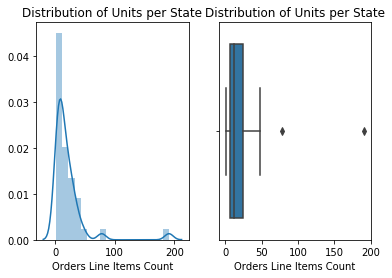

In [141]:
# Line Item Count by state summary statistics 
print('Summary Statistics for States with Sales')
print('----------------------------------------')
print("Average Units Per State: ", round(item_per_state.mean(),2))
print("Median Units Per State: ", round(item_per_state.median(),2))
print("Mode Units Per State: ", item_per_state.mode()[0])
print('----------------------------------------')


#plotting distribution
plt.subplot(1,2,1)
plt.title('Distribution of Units per State')
sns.distplot(item_per_state);

plt.subplot(1,2,2)
plt.title('Distribution of Units per State')
sns.boxplot(item_per_state);

Summary Statistics for States with Sales Excluding CA & NY
----------------------------------------
Average Units Per State:  14.88
Median Units Per State:  11.0
Mode Units Per State:  5
----------------------------------------


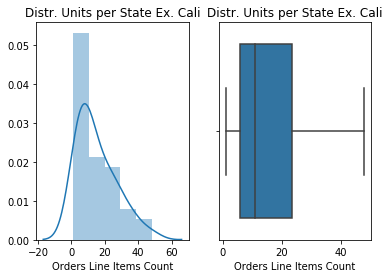

In [142]:
# Line Item Count by state (ex CA & NY) summary statistics 
print('Summary Statistics for States with Sales Excluding CA & NY')
print('----------------------------------------')
ex_ca_ny = item_per_state.drop(['CA','NY'])
print("Average Units Per State: ", round(ex_ca_ny.mean(),2))
print("Median Units Per State: ", round(ex_ca_ny.median(),2))
print("Mode Units Per State: ", ex_ca_ny.mode()[0])
print('----------------------------------------')

#plotting distribution
plt.subplot(1,2,1)
plt.title('Distr. Units per State Ex. Cali')
sns.distplot(ex_ca_ny);

plt.subplot(1,2,2)
plt.title('Distr. Units per State Ex. Cali')
sns.boxplot(ex_ca_ny);

California and NY sell more line items than any other state.  We can see with our boxplot on the left that both states sell more that 1.5 times the IQR, leaving them as outliers. So, the summary statistics of the Line Items ordered per state are better looked at excluding both California and NY.  On average, there were about 15 Units ordered per state that this company did business in.  However, the median # of Units was only 11. 

## Which states have the highest price per unit?
Assuming the one inventory type, we can look at which states sell the units for the most amount of money.  

If I assume similar expenses for each state, the client may find it valuable to grow their operations/focus marketing dollars in states that can sell the product at higher profit margins.  However, this analysis would be more valuable if we had expenses or profit margins by state.

In [6]:
# Finding price per unit as Cart Value/ Line Items Count, by State
price_per_product = df.groupby('Orders Shipping State').sum()[['Orders Line Items Count','Orders Cart Value']]
price_per_product['Price Per Unit'] = price_per_product['Orders Cart Value']/price_per_product['Orders Line Items Count']
price_per_product['Price Per Unit'] = price_per_product['Price Per Unit'].apply(lambda x: '${:,.2f}'.format(x))
price_per_product.drop(['Orders Line Items Count', 'Orders Cart Value'], axis=1).sort_values(by='Price Per Unit', ascending=False)

,Price Per Unit
Orders Shipping State,
SD,$68.00
RI,$45.00
OK,$44.20
AZ,$43.38
GA,$43.08
KS,$42.44
ND,$40.92
NM,$37.77
NY,$37.08


## Which Zip Code areas have the highest price per unit?

Similar thought process to above.  Client may want to focus marketing dollars on zip codes/ zipcode groups that may allow the highest profit margin

Without enriching the zip codes any further (at this point), we'll group zip codes with the same first 3 digits together to create a zip code area

In [89]:
# Adding zip code group to the DF as first 3 numbers in zipcode
df['Zipgroup'] = df['Orders Shipping Zipcode'].apply(lambda x: x[:3])

# Finding price per unit as Cart Value/ Line Items Count, by zip code group
# Showing top ten PPU by zip code group
price_per_product_by_zip = df.groupby('Zipgroup').sum()[['Orders Line Items Count','Orders Cart Value']]
price_per_product_by_zip['Price Per Unit'] = price_per_product_by_zip['Orders Cart Value']/price_per_product_by_zip['Orders Line Items Count']
price_per_product_by_zip['Price Per Unit'] = price_per_product_by_zip['Price Per Unit'].apply(lambda x: '${:,.2f}'.format(x))
top10_zips = price_per_product_by_zip.drop(['Orders Line Items Count', 'Orders Cart Value'], axis=1).sort_values(by='Price Per Unit', ascending=False)[:10]
top10_zips

,Price Per Unit
Zipgroup,
307,$81.33
811,$68.00
574,$68.00
919,$68.00
376,$68.00
956,$64.00
105,$59.32
141,$59.16
023,$57.80


In [156]:
# States associated with top 10 PPUs by zip code group
set(df[df['Zipgroup'].isin(top10_zips.index.tolist())]['Orders Shipping State'])

{'CA', 'CO', 'GA', 'MA', 'NY', 'SD', 'TN'}

## Can median household income by zipcode guide business?

Enriched Zipcodes with Median Household Income.  Looking for the zip codes with the highest median income.  These zip codes may have more expendable income, so may be valuable to focus marketing in these areas.

Top 5% of Median Household Zipcodes
    Orders Shipping Zipcode  Median Income
45                    10514       202414.0
81                    20854       192648.0
25                    06840       161848.0
23                    06807       141371.0
91                    22205       140819.0
77                    20143       139938.0
273                   90266       139259.0
327                   94707       138144.0
24                    06831       130075.0
2                     01778       130022.0
79                    20155       127974.0
336                   95746       127736.0
215                   77494       126425.0
305                   92887       125265.0
323                   94526       124511.0
319                   94301       122473.0
78                    20147       122115.0
229                   80108       120159.0
338                   95762       119382.0


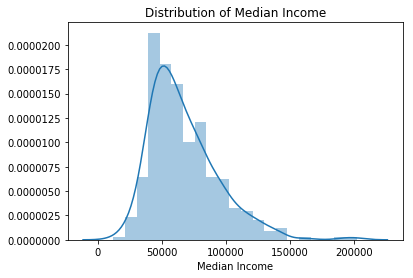

In [98]:
# Search engine for zip code enrichment
search = SearchEngine(simple_zipcode = True)

# Create DF of all zip codes where client has done business
# Add Median Household Income to the zip code df
# Remove any null values
# Turn incomes into floats (from strings)
all_zips = df.drop('Orders Order Number', axis=1).groupby('Orders Shipping Zipcode').sum().reset_index(drop=False)
all_zips['Median Income'] = all_zips['Orders Shipping Zipcode'].apply(lambda x: search.by_zipcode(x).to_dict()['median_household_income'])
all_zips.dropna(inplace=True)
all_zips['Median Income'] = all_zips['Median Income'].apply(lambda x: round(float(x), 2))

#plot distribution of incomes
plt.title('Distribution of Median Income')
sns.distplot(all_zips['Median Income']);

# Show top 5% of median incomes by zip code
med_incomes = all_zips.drop(['Orders Line Items Count', 'Orders Cart Value'], axis = 1).sort_values(by='Median Income', ascending=False)
print('Top 5% of Median Household Zipcodes')
print(med_incomes[:round(.05*(len(all_zips['Median Income'])))])